# Initialization

## Package Loading

In [1]:
from typing import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Model Initialization
* model:
$$y=w_1a_1 + w_0a_0$$

In [2]:
class LR_model:
  def __init__(self, w1, w0):
    self.w1 = w1
    self.w0 = w0


  def get_predict_result(self, a1: np.ndarray) -> np.ndarray:
    a0 = 1
    pred = []
    for inp in a1:
      pred.append(self.w1*inp + self.w0*a0)

    return np.array(pred)

# Data Loading
* Dataset:
$$ D = (-3, -2.5), (-1, 0.8), (1, 4), (3, 2), (5, 5.3)$$
* 假設第一個數字是輸入, 第二個數字是輸出

In [3]:
D = np.array([[-3.0, -2.5], [-1.0, 0.8], [1.0, 4.0], [3.0, 2.0], [5.0, 5.3]])

In [4]:
D[:,0]

array([-3., -1.,  1.,  3.,  5.])

# Q1
* 這邊的error假設是MSE
* $E = \sum_{i=1}^{n}{(y-\hat{y})^2}$

In [5]:
# predict and ground truth
def MSE(pred: np.ndarray, gt: np.ndarray) -> float:
  n = len(pred)
  mse = 0
  for i in range(n):
    sq_err = (pred[i] - gt[i])**2
    mse += sq_err

  return mse

In [6]:
model = LR_model(0.97, 1.1)

In [7]:
total_error = MSE(model.get_predict_result(D[:, 0]), D[:, 1])
print(f"The total error is: {total_error}")

The total error is: 9.112499999999997


# Q2
$Error = f(w_0, w_1)$
* 想要利用Mean Square Error的觀念套用在Error上。我想要找到一組$(w_0, w_1)$，使得MSE能夠最小
---
1. 列出MSE的定義：
$$Error = f(w_0, w_1) = \sum_{i=1}^{n}{(y-\hat{y})^2}$$
2. 其中 $\hat{y}$ 是我們的模型輸出，$\hat{y}=w_1a_1 + w_0a_0 ; a_0=1$，所以： $$Error = f(w_0, w_1) = \sum_{i=1}^{n}{(y-(w_1a_1 + w_0a_0))^2}$$
3. 展開後的結果是：
$$Error = f(w_0, w_1) = \sum_{i=1}^{n}{y^2 + a_1^2w_1^2 + a_0^2w_0^2 - 2yw_1a_1 - 2yw_0a_0 + 2w_1w_0a_1a_0}$$

# Q3

* 利用偏微分技巧，對$Error$內的每個變數做偏微分，會得到一個聯立方程組
* 令每個方程組裡面的方程式等於0，可以求得方程式中的極值
* 由於$w_0$與$w_1$的最高次數為2次，且開口向下，因此微分等於0的情況只會存在於最低點(global minima)

---
(下面式子已經將$a_0=1$代入，並且以n筆資料為例，省略sum符號的上下標) \\
 \\
對$w_1$做偏微分：
$$\frac{\partial}{\partial w_0}\left(\sum_{i=1}^{n}{(y_i-(w_1a_{1i} + w_0))^2}\right) = -2\sum a_{1i}(y_i - (w_1 \cdot a_{1i} + w_0))$$

對$w_0$做偏微分：
$$\frac{\partial}{\partial w_1}\left(\sum_{i=1}^{n}{(y_i-(w_1a_{1i} + w_0))^2}\right) = -2\sum (y_i - (w_1 \cdot a_{1i} + w_0))$$

把式子寫成一個聯立方程組：
$$
\begin{cases}
-2\sum a_{1i}(y_i - (w_1 \cdot a_{1i} + w_0)) &= 0 \\
-2\sum (y_i - (w_1 \cdot a_{1i} + w_0)) &= 0
\end{cases}
$$ \\

由第二條式子得到 $w_0 = \frac{1}{n}\sum{y_i-w_1a_{1i}}$ \\
由第一條式子得到 $ \sum{y_ia_{1i}} - \sum{w_1a_{1i}^2} - \sum{w_0a_{1i}} = 0 $ \\
將上面的第一條式子帶入第二條式子即可求得$w_1$
 \\

最後解出$w_0$與$w_1$分別為：

$$
\begin{cases}
w_1 = \frac{\sum{(y_i-y_{avg})(a_{1i}-a_{1avg})}}{\sum{(a_{1i}-a_{1avg}})^2} \\
 \\
w_0 = \frac{1}{n}\sum{y_i-w_1a_{1i}} = y_{avg} - a_{1avg}w_1
\end{cases}
$$

# Q4

In [8]:
y_avg = np.mean(D[:, 1])
y_i_minus_avg = D[:, 1] - y_avg

a1_avg = np.mean(D[:, 0])
a1_i_minus_avg = D[:, 1] - a1_avg

new_w1 = np.sum(y_i_minus_avg * a1_i_minus_avg) / np.sum(np.square(a1_i_minus_avg))
new_w0 = y_avg - a1_avg*new_w1

print(f"w1: {new_w1}, w0: {new_w0}")

new_model = LR_model(new_w1, new_w0)

w1: 0.8962236390387444, w0: 1.0237763609612556


In [9]:
new_total_error = MSE(new_model.get_predict_result(D[:, 0]), D[:, 1])
print(f"The Q1 total error is: {total_error}")
print(f"The new total error is: {new_total_error}\n")
print("由此可知，f(w1*, w0*)所得到的total error，比問題一的還要小")

The Q1 total error is: 9.112499999999997
The new total error is: 8.450443903470362

由此可知，f(w1*, w0*)所得到的total error，比問題一的還要小


# Q5
* 這邊我打算用MSE的方式，來比較兩個模型在測試資料上的好壞

In [10]:
D_test = np.array([[2.5, 2.5], [3.7,3.8]])

In [11]:
test_original_mse = MSE(model.get_predict_result(D_test[:, 0]), D_test[:, 1])
test_new_mse = MSE(new_model.get_predict_result(D_test[:, 0]), D_test[:, 1])

In [12]:
print(f"The MSE of testing data in the original model is: {test_original_mse}")
print(f"The MSE of testing data in the new model is: {test_new_mse}\n")

The MSE of testing data in the original model is: 1.8409460000000002
The MSE of testing data in the new model is: 0.8755968631306978



In [13]:
print("""
由MSE的比較結果可知，在這組testing data上，後來的模型(透過偏微分推導的模型)取得了較好的結果
下面用畫圖的方式來定性分析驗證結果
""")


由MSE的比較結果可知，在這組testing data上，後來的模型(透過偏微分推導的模型)取得了較好的結果
下面用畫圖的方式來定性分析驗證結果



<function matplotlib.pyplot.show(close=None, block=None)>

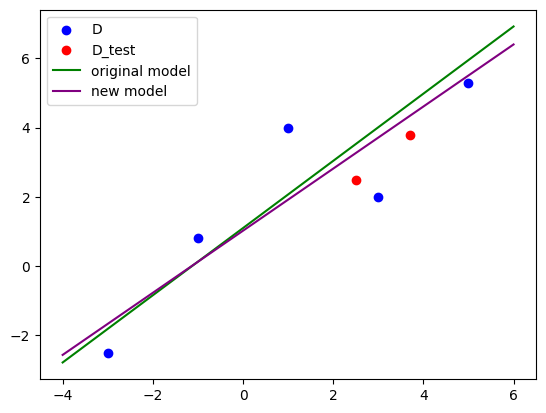

In [14]:
# 訓練資料、測試資料、model、new_model 示意圖
plt.scatter(D[:, 0], D[:, 1], label='D', color='blue')
plt.scatter(D_test[:,0], D_test[:,1], label='D_test', color='red')

original_x = np.linspace(-4, 6, 100)
original_y = model.get_predict_result(original_x)

new_x = np.linspace(-4, 6, 100)
new_y = new_model.get_predict_result(new_x)

plt.plot(original_x, original_y, label='original model', color='green')
plt.plot(new_x, new_y, label='new model', color='purple')

plt.legend(loc='best')

plt.show